# 朴素贝叶斯上手
## Gaussian Naive Bayes

In [ ]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
GaussianNB(priors=None)
print(clf.predict([[-0.8, -1]]))

In [ ]:
clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))
GaussianNB(priors=None)
print(clf_pf.predict([[-0.8, -1]]))

### 有关地形数据的高斯 NB 部署

In [ ]:
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture, output_image
from ClassifyNB import classify

import numpy as np
import pylab as pl


features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


# You will need to complete this function imported from the ClassifyNB script.
# Be sure to change to that code tab to complete this quiz.
clf = classify(features_train, labels_train)


### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)
output_image("test.png", "png", open("test.png", "rb").read())


## SVM 

In [ ]:
import sys
from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl


features_train, labels_train, features_test, labels_test = makeTerrainData()


########################## SVM #################################
### we handle the import statement and SVC creation for you here
from sklearn.svm import SVC
clf = SVC(kernel="linear")

#### now your job is to fit the classifier
#### using the training features/labels, and to
#### make a set of predictions on the test data
clf.fit(features_train, labels_train)

#### store your predictions in a list named pred
pred = clf.predict(features_test)


from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)

def submitAccuracy():
    return acc

## 决策树
### 决策树编码
结果会看到如下的图：
![image](http://wx1.sinaimg.cn/large/69d4185bly1fn60zhwmpyj20du09wwex.jpg)

In [ ]:
# studentMain.py
#!/usr/bin/python

""" lecture and example code for decision tree unit """

import sys
from class_vis import prettyPicture, output_image
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from classifyDT import classify

features_train, labels_train, features_test, labels_test = makeTerrainData()

### the classify() function in classifyDT is where the magic
### happens--fill in this function in the file 'classifyDT.py'!
clf = classify(features_train, labels_train)


#### grader code, do not modify below this line

prettyPicture(clf, features_test, labels_test)
output_image("test.png", "png", open("test.png", "rb").read())


In [ ]:
# classifyDT.py
def classify(features_train, labels_train):
    
    ### your code goes here--should return a trained decision tree classifer
    from sklearn import tree
    
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(features_train, labels_train)
    return clf

### 决策树准确性
输出：`{"message": "{'acc': 0.908}"}`

In [ ]:
import sys
from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData

import numpy as np
import pylab as pl

features_train, labels_train, features_test, labels_test = makeTerrainData()

########################## DECISION TREE #################################
#### your code goes here
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)

pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)### you fill this in!
### be sure to compute the accuracy on the test set


    
def submitAccuracies():
  return {"acc":round(acc,3)}



### 决策树准确性
决策树的参数可参考[sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

min_samples_split 对于精确对的影响，测试为 2 与 50 的精确度。

输出如下结果：`{"message": "{'acc_min_samples_split_50': 0.912, 'acc_min_samples_split_2': 0.908}"}`

In [ ]:
import sys
from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

features_train, labels_train, features_test, labels_test = makeTerrainData()

########################## DECISION TREE #################################
### your code goes here--now create 2 decision tree classifiers,
### one with min_samples_split=2 and one with min_samples_split=50
### compute the accuracies on the testing data and store
### the accuracy numbers to acc_min_samples_split_2 and
### acc_min_samples_split_50, respectively

from sklearn import tree
from sklearn.metrics import accuracy_score

clf2 = tree.DecisionTreeClassifier(min_samples_split = 2)
clf2 = clf2.fit(features_train, labels_train)
pred2 = clf2.predict(features_test)
acc_min_samples_split_2 = accuracy_score(pred2, labels_test)

clf50 = tree.DecisionTreeClassifier(min_samples_split = 50)
clf50 = clf50.fit(features_train, labels_train)
pred50 = clf50.predict(features_test)
acc_min_samples_split_50 = accuracy_score(pred50, labels_test)


def submitAccuracies():
  return {"acc_min_samples_split_2":round(acc_min_samples_split_2,3),
          "acc_min_samples_split_50":round(acc_min_samples_split_50,3)}

In [ ]:
# 使用 scipy 计算熵
import scipy.stats
print scipy.stats.entropy([1,1],base=2)

## 回归
### Sklearn 中的年龄/净值回归
在[udacity](https://classroom.udacity.com/nanodegrees/nd009-cn-advanced/parts/4463c984-c2f2-43d6-a618-e6267bcbb4ed/modules/91d12374-ccfd-408f-90e6-4eefec28bbdc/lessons/5409540887/concepts/30400486110923)中运行代码，将看到如下的输出：
![img](https://ws1.sinaimg.cn/large/69d4185bly1fn82r02e8hj20e80aot96.jpg)

In [ ]:
# studentMain.py
#!/usr/bin/python

import numpy
import matplotlib
matplotlib.use('agg')

import matplotlib.pyplot as plt
from studentRegression import studentReg
from class_vis import prettyPicture, output_image

from ages_net_worths import ageNetWorthData

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()

reg = studentReg(ages_train, net_worths_train)


plt.clf()
plt.scatter(ages_train, net_worths_train, color="b", label="train data")
plt.scatter(ages_test, net_worths_test, color="r", label="test data")
plt.plot(ages_test, reg.predict(ages_test), color="black")
plt.legend(loc=2)
plt.xlabel("ages")
plt.ylabel("net worths")


plt.savefig("test.png")
output_image("test.png", "png", open("test.png", "rb").read())

In [ ]:
# studentRegression.py
def studentReg(ages_train, net_worths_train):
    ### import the sklearn regression module, create, and train your regression
    ### name your regression reg
    
    ### your code goes here!
    from sklearn import linear_model
    
    reg = linear_model.LinearRegression()
    reg.fit(ages_train, net_worths_train)
    
    return reg

### 练习提取信息
运行将会得到如下输出：
```json
{
    "slope": 6.473549549577059, 
    "stats on training": 0.8745882358217186, 
    "intercept": -14.35378330775552, 
    "stats on test": 0.812365729230847, 
    "networth": 160.43205453082507
}
```

In [ ]:
# ages_net_worths.py
import numpy
import random

def ageNetWorthData():

    random.seed(42)
    numpy.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    from sklearn.cross_validation import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages_train, ages_test, net_worths_train, net_worths_test

In [ ]:
# regressionQuiz.py
import numpy
import matplotlib.pyplot as plt

# from ages_net_worths import ageNetWorthData

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

### get Katie's net worth (she's 27)
### sklearn predictions are returned in an array, so you'll want to index into
### the output to get what you want, e.g. net_worth = predict([[27]])[0][0] (not
### exact syntax, the point is the [0] at the end). In addition, make sure the
### argument to your prediction function is in the expected format - if you get
### a warning about needing a 2d array for your data, a list of lists will be
### interpreted by sklearn as such (e.g. [[27]]).
km_net_worth = reg.predict([[27]])[0][0] ### fill in the line of code to get the right value

### get the slope
### again, you'll get a 2-D array, so stick the [0][0] at the end
### fill in the line of code to get the right value
### reg.coef_输出为 [[ 6.47354955]]
slope = reg.coef_[0][0] 

### get the intercept
### here you get a 1-D array, so stick [0] on the end to access
### the info we want
### fill in the line of code to get the right value
### reg.intercept_ 输出为 [-14.35378331]
intercept = reg.intercept_[0]


### get the score on test data
test_score = reg.score(ages_test, net_worths_test) ### fill in the line of code to get the right value


### get the score on the training data
training_score = reg.score(ages_train, net_worths_train) ### fill in the line of code to get the right value



def submitFit():
    # all of the values in the returned dictionary are expected to be
    # numbers for the purpose of the grader.
    return {"networth":km_net_worth,
            "slope":slope,
            "intercept":intercept,
            "stats on test":test_score,
            "stats on training": training_score}

In [22]:
data = [('a',1),('b',4),('c',3),('d',5)]
sorted(data, key = lambda t:t[1])[:2]

[('a', 1), ('c', 3)]

# 交叉验证
## 在 Sklearn 中分开的训练/测试

In [ ]:
# studentCode.py
#!/usr/bin/python

""" 
PLEASE NOTE:
The api of train_test_split changed and moved from sklearn.cross_validation to
sklearn.model_selection(version update from 0.17 to 0.18)

The correct documentation for this quiz is here: 
http://scikit-learn.org/0.17/modules/cross_validation.html
"""

from sklearn import datasets
from sklearn.svm import SVC

iris = datasets.load_iris()
features = iris.data
labels = iris.target

###############################################################
### YOUR CODE HERE
###############################################################

### import the relevant code and make your train/test split
### name the output datasets features_train, features_test,
### labels_train, and labels_test
# PLEASE NOTE: The import here changes depending on your version of sklearn
from sklearn import cross_validation # for version 0.17
# For version 0.18
# from sklearn.model_selection import train_test_split


### set the random_state to 0 and the test_size to 0.4 so
### we can exactly check your result
features_train, features_test, labels_train, labels_test 
        = cross_validation.train_test_split(features, labels, test_size=0.4)

###############################################################
# DONT CHANGE ANYTHING HERE
clf = SVC(kernel="linear", C=1.)
clf.fit(features_train, labels_train)

print clf.score(features_test, labels_test)
##############################################################
def submitAcc():
    return clf.score(features_test, labels_test)

In [ ]:
# subFunction.py
def submitAcc():
    return clf.score(features_test, labels_test)

# 误差原因
## Noisy Data, Complex Model

Regressor score: 1.0000


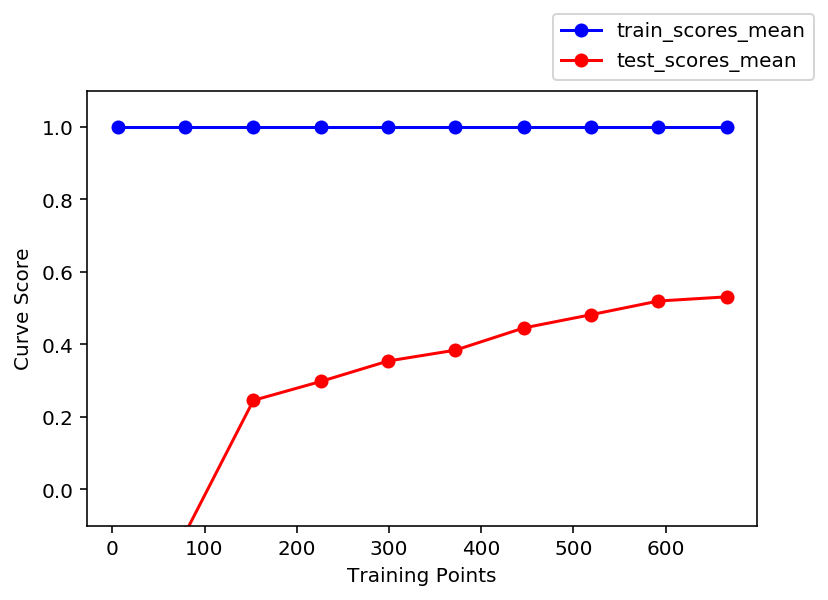

In [19]:
# In this exercise we'll examine a learner which has high variance, and tries to learn
# nonexistant patterns in the data.
# Use the learning curve function from sklearn.learning_curve to plot learning curves
# of both training and testing error.
# CODE YOU HAVE TO TYPE IN IS IN LINE 35
%matplotlib inline
# 用于支持 retina 屏幕
%config InlineBackend.figure_format = 'retina'
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
# PLEASE NOTE:
# In sklearn 0.18, the import would be from sklearn.model_selection import learning_curve
# from sklearn.learning_curve import learning_curve # sklearn version 0.17
from sklearn.model_selection import learning_curve # sklearn version 0.18
from sklearn.cross_validation import KFold
from sklearn.metrics import explained_variance_score, make_scorer
import numpy as np

# Set the learning curve parameters; you'll need this for learning_curves
size = 1000
cv = KFold(size,shuffle=True)
score = make_scorer(explained_variance_score)

# Create a series of data that forces a learner to have high variance
X = np.round(np.reshape(np.random.normal(scale=5,size=2*size),(-1,2)),2)
y = np.array([[np.sin(x[0]+np.sin(x[1]))] for x in X])

def plot_curve():
    # Defining our regression algorithm
    reg = DecisionTreeRegressor()
    # Fit our model using X and y
    reg.fit(X,y)
    print "Regressor score: {:.4f}".format(reg.score(X,y))
    
    # TODO: Use learning_curve imported above to create learning curves for both the
    #       training data and testing data. You'll need reg, X, y, cv and score from above.
    
    train_sizes, train_scores, test_scores = learning_curve(reg, X, y, cv=cv, scoring=score, train_sizes=np.linspace(.01, 1.0, 10))
    
    # Taking the mean of the test and training scores
    train_scores_mean = np.mean(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    
    # Plotting the training curves and the testing curves using train_scores_mean and test_scores_mean 
    plt.plot(train_sizes ,train_scores_mean,'-o',color='b',label="train_scores_mean")
    plt.plot(train_sizes,test_scores_mean ,'-o',color='r',label="test_scores_mean")
    
    # Plot aesthetics
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Curve Score")
    plt.xlabel("Training Points")
    plt.legend(bbox_to_anchor=(1.1, 1.2))
    plt.show()

plot_curve()